<a href="https://colab.research.google.com/github/coderanandmaurya/Feature-engineering/blob/main/feature_scaling_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL="https://raw.githubusercontent.com/coderanandmaurya/Feature-engineering/main/Salary_Data.csv"
data=pd.read_csv(URL)

In [3]:
data.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [4]:
data['Age'] = data['Age'].astype(int)

In [5]:
data.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.100000,76003.000000
std,2.837888,5.267663,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.000000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


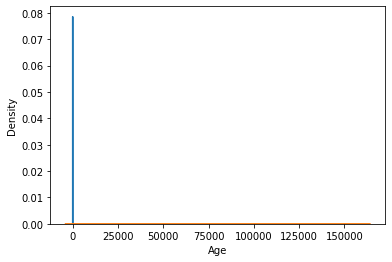

In [6]:
sns.kdeplot(data['Age'])
sns.kdeplot(data['Salary'])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)

In [8]:
data_scaled= pd.DataFrame(data_scaled, columns=data.columns)

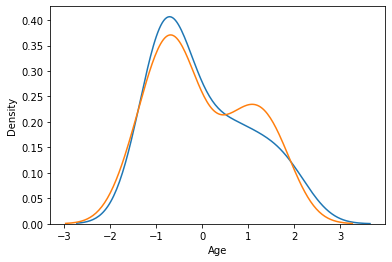

In [9]:
sns.kdeplot(data_scaled['Age'])
sns.kdeplot(data_scaled['Salary'])

In [10]:
data_scaled.describe()

,YearsExperience,Age,Salary
count,3.000000e+01,3.000000e+01,3.000000e+01
mean,-7.401487e-18,-2.516506e-16,-4.440892e-17
std,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.510053e+00,-1.177805e+00,-1.419919e+00
25%,-7.574158e-01,-7.916396e-01,-7.153855e-01
50%,-2.198178e-01,-4.054739e-01,-3.994264e-01
75%,8.553781e-01,7.047523e-01,9.105167e-01
max,1.858894e+00,2.104603e+00,1.721028e+00


In [11]:
np.round(data.describe(), 1)

,YearsExperience,Age,Salary
count,30.0,30.0,30.0
mean,5.3,27.1,76003.0
std,2.8,5.3,27414.4
min,1.1,21.0,37731.0
25%,3.2,23.0,56720.8
50%,4.7,25.0,65237.0
75%,7.7,30.8,100544.8
max,10.5,38.0,122391.0


In [12]:
np.round(data_scaled.describe(), 1)

,YearsExperience,Age,Salary
count,30.0,30.0,30.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-1.5,-1.2,-1.4
25%,-0.8,-0.8,-0.7
50%,-0.2,-0.4,-0.4
75%,0.9,0.7,0.9
max,1.9,2.1,1.7


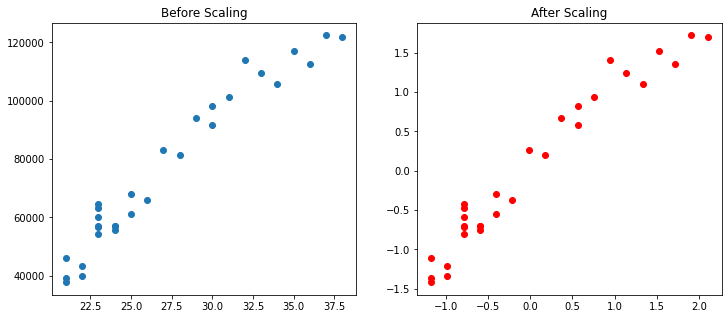

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(data['Age'], data['Salary'])
ax1.set_title("Before Scaling")
ax2.scatter(data_scaled['Age'], data_scaled['Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## **Effect of Outlier**


In [14]:
df = data.append(pd.DataFrame({'YearsExperience':[0,40],'Age':[5,70],'Salary':[100,200000]}),ignore_index=True)

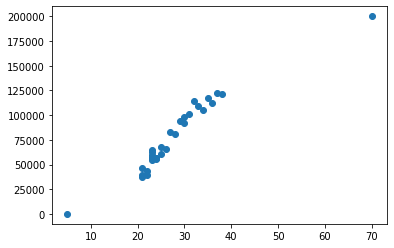

In [15]:
plt.scatter(df['Age'], df['Salary'])

In [16]:
# transform train and test sets
new_scaled = scaler.transform(df)

In [17]:
new_scaled = pd.DataFrame(new_scaled, columns=df.columns)

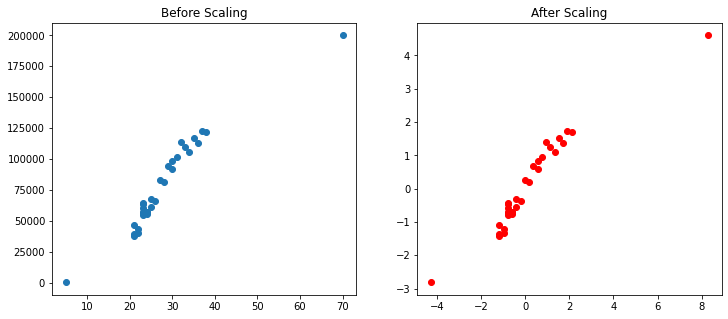

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['Age'], df['Salary'])
ax1.set_title("Before Scaling")
ax2.scatter(new_scaled['Age'], new_scaled['Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()